In [1]:
# !pip install tensorflow
# !pip install numpy
# !pip install pandas
# !pip install matplotlib


In [2]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

C:\Users\Gelo\AppData\Local\Temp\ipykernel_8512\1025810437.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (96, 96)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 984 files belonging to 3 classes.
Using 788 files for training.
Found 984 files belonging to 3 classes.
Using 196 files for validation.


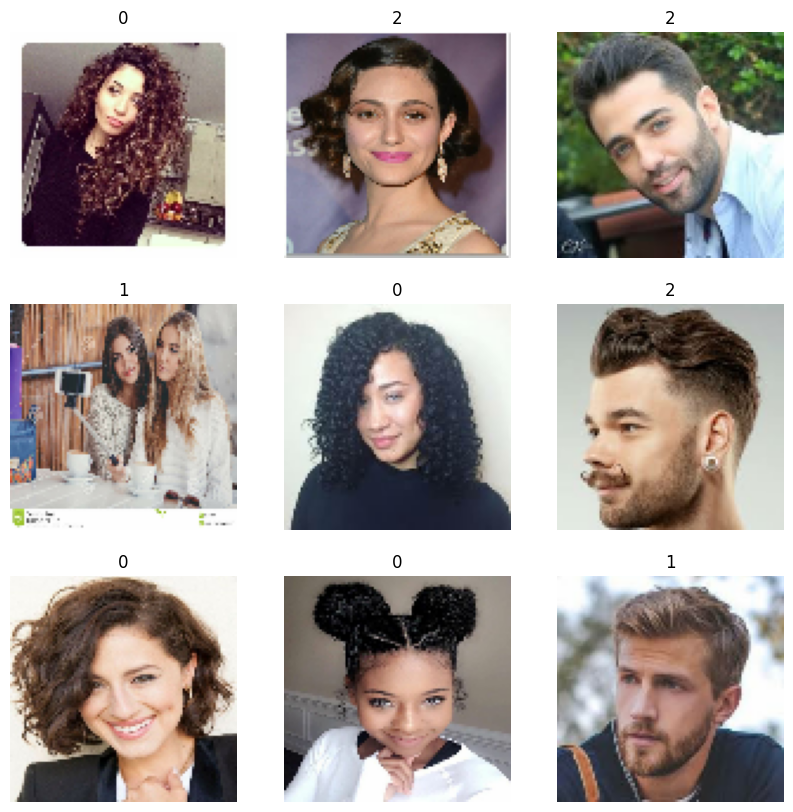

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.3126 - loss: 2.7068 - val_accuracy: 0.3265 - val_loss: 2.5966
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.3368 - loss: 2.5849 - val_accuracy: 0.2857 - val_loss: 2.5393
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.3650 - loss: 2.5218 - val_accuracy: 0.2857 - val_loss: 2.4770
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.3764 - loss: 2.4583 - val_accuracy: 0.2857 - val_loss: 2.4135
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.3471 - loss: 2.3968 - val_accuracy: 0.2857 - val_loss: 2.3510
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.3773 - loss: 2.3288 - val_accuracy: 0.2857 - val_loss: 2.2888
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.3570 - loss: 2.2654 - val_accuracy: 0.2857 - val_loss: 2.2274
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.3591 - loss: 2.1949 - val_accu

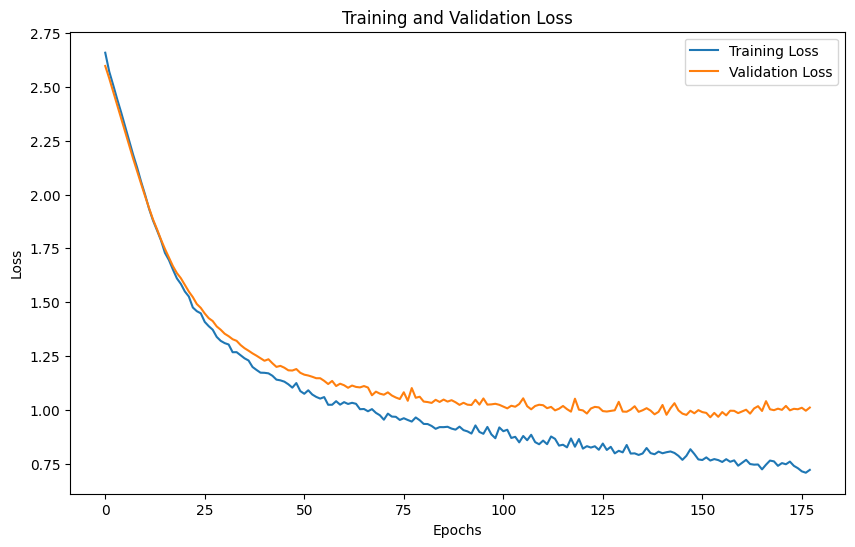

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=16, kernel_size=16, strides=(1,1), padding='valid', dilation_rate=1, kernel_regularizer=keras.regularizers.l2(0.01))) # Adding Conv2D layer
model.add(layers.Activation("relu")) # Adding ReLU activation function
model.add(layers.MaxPooling2D((2, 2))) # Adding MaxPooling layer
model.add(Dropout(0.4))  # Adding Dropout


model.add(layers.Conv2D(filters=32, kernel_size=8, strides=(1,1), padding='valid', dilation_rate=1, kernel_regularizer=keras.regularizers.l2(0.01))) 
model.add(layers.Activation("relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.4))  # Adding Dropout


model.add(layers.Conv2D(filters=64, kernel_size=4, strides=(1,1), padding='valid', dilation_rate=1, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.4))  # Adding Dropout

model.add(layers.Conv2D(filters=128, kernel_size=4, strides=(1,1), padding='valid', dilation_rate=1, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.4))  # Adding Dropout


model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(Dropout(0.4))  # Adding Dropout

model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

#tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

epochs = 200


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Define the early stopping callback
early_stopping = EarlyStopping(patience=25, restore_best_weights=True)

# Train the model with early stopping
#model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping])

import matplotlib.pyplot as plt

# Assuming train_ds and val_ds are defined and the model is compiled
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping])

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
This image is 0.79 percent curly hair, 0.16 percent straight hair, and 0.05 percent wavy hair.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
This image is 0.79 percent curly hair, 0.16 percent straight hair, and 0.05 percent wavy hair.
